1. get reuters dataset

In [23]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = \
    reuters.load_data(num_words=10000)
print('train_data len:', len(train_data))
print('test_data len:', len(test_data))
print('train_data sample:', train_data[10])

train_data len: 8982
test_data len: 2246
train_data sample: [1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


2. get index to word

In [24]:
word_index = reuters.get_word_index()
reverse_word_index = dict([
    (value, key) for (key, value) in word_index.items()
])
decoded_newswire = ' '.join([
    reverse_word_index.get(i - 3, '?') for i in train_data[0]
]) #smae as IMDB_calssifier
print('train_data[0]:', decoded_newswire)
print('train_labels[0]:', train_labels[0])

train_data[0]: ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
train_labels[0]: 3


3. one-hot code the data

In [25]:
import numpy as np 
from keras.utils.np_utils import to_categorical
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
# one-hot
# def to_one_hot(labels, dimension=46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1.0
#     return results
# one_hot_train_labels = to_one_hot(train_labels)
# one_hot_test_labels = to_one_hot(test_labels)
# directly use to_categorical built in Keras
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


4. model define and compile

In [26]:
from keras import models, layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
# one-hot --> categorical_crossentropy，
# digit --> sparse_categorical_crossentropy
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
    metrics=['accuracy'])

5. hold the val data and train

In [27]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [28]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, 
    batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 40ms/step - loss: 2.7393 - accuracy: 0.4742 - val_loss: 1.8541 - val_accuracy: 0.6220
Epoch 2/20
16/16 [==============================] - 1s 33ms/step - loss: 1.4908 - accuracy: 0.6933 - val_loss: 1.3454 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 0s 31ms/step - loss: 1.0744 - accuracy: 0.7756 - val_loss: 1.1440 - val_accuracy: 0.7570
Epoch 4/20
16/16 [==============================] - 1s 32ms/step - loss: 0.8367 - accuracy: 0.8294 - val_loss: 1.0282 - val_accuracy: 0.7920
Epoch 5/20
16/16 [==============================] - 0s 30ms/step - loss: 0.6607 - accuracy: 0.8677 - val_loss: 1.0059 - val_accuracy: 0.7890
Epoch 6/20
16/16 [==============================] - 1s 33ms/step - loss: 0.5311 - accuracy: 0.8934 - val_loss: 0.9237 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 0s 30ms/step - loss: 0.4287 - accuracy: 0.9107 - val_loss: 0.8964 - val_accuracy: 0.8190
Epoch 8/20
16

In [29]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


6. visual the results

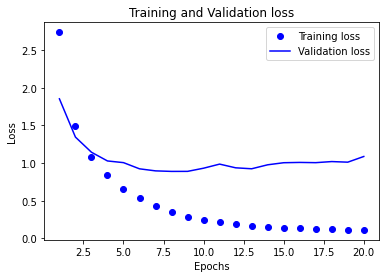

In [30]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

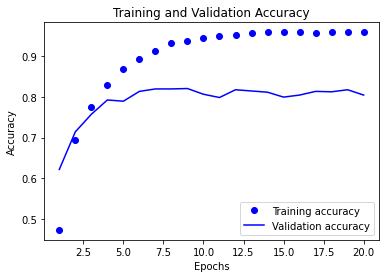

In [31]:
plt.clf() 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

7. overfit--> minimize the epoches

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', 
    metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, 
    validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print('results:', results)

Epoch 1/9
16/16 [==============================] - 1s 39ms/step - loss: 2.7238 - accuracy: 0.5056 - val_loss: 1.8551 - val_accuracy: 0.6440
Epoch 2/9
16/16 [==============================] - 1s 32ms/step - loss: 1.4910 - accuracy: 0.7077 - val_loss: 1.3266 - val_accuracy: 0.7240
Epoch 3/9
16/16 [==============================] - 1s 32ms/step - loss: 1.0702 - accuracy: 0.7854 - val_loss: 1.1538 - val_accuracy: 0.7680
Epoch 4/9
16/16 [==============================] - 0s 30ms/step - loss: 0.8371 - accuracy: 0.8304 - val_loss: 1.0244 - val_accuracy: 0.7820
Epoch 5/9
16/16 [==============================] - 0s 30ms/step - loss: 0.6701 - accuracy: 0.8632 - val_loss: 0.9611 - val_accuracy: 0.8020
Epoch 6/9
16/16 [==============================] - 0s 31ms/step - loss: 0.5397 - accuracy: 0.8895 - val_loss: 0.9281 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 1s 31ms/step - loss: 0.4334 - accuracy: 0.9090 - val_loss: 0.9071 - val_accuracy: 0.8100
Epoch 8/9
16/16 [===

8. random classifier result

In [33]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
print(float(np.sum(hits_array)) / len(test_labels))

0.17764915405164738


9. possibility of predict on 46 category

In [34]:
predictions = model.predict(x_test)
print('predictions.shape:', predictions.shape)
print('probability sum:', np.sum(predictions[0]))
print('max probability category:', np.argmax(predictions[0]))

71/71 [==============================] - 0s 2ms/step
predictions.shape: (2246, 46)
probability sum: 1.0
max probability category: 3
